<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/B_Comparing_a_CNN_model_with_vs_without_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Set random seed
tf.random.set_seed(42)


In [2]:
# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand channel dimension
x_train_full = np.expand_dims(x_train_full, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Subset: 4500 training, 500 validation
x_train, y_train = x_train_full[:4500], y_train_full[:4500]
x_val, y_val = x_train_full[4500:5000], y_train_full[4500:5000]

print("Train shape:", x_train.shape)
print("Validation shape:", x_val.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (4500, 28, 28, 1)
Validation shape: (500, 28, 28, 1)


In [3]:
# Function to create a CNN with or without dropout
def build_model(dropout_rate=0.0):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [4]:
# Build and train without dropout
model_no_dropout = build_model(dropout_rate=0.0)
history_no = model_no_dropout.fit(x_train, y_train,
                                  validation_data=(x_val, y_val),
                                  epochs=20,
                                  batch_size=64,
                                  verbose=2)

# Build and train with dropout
model_with_dropout = build_model(dropout_rate=0.5)
history_with = model_with_dropout.fit(x_train, y_train,
                                      validation_data=(x_val, y_val),
                                      epochs=20,
                                      batch_size=64,
                                      verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
71/71 - 7s - 98ms/step - accuracy: 0.6409 - loss: 0.9822 - val_accuracy: 0.7980 - val_loss: 0.5253
Epoch 2/20
71/71 - 0s - 6ms/step - accuracy: 0.7969 - loss: 0.5596 - val_accuracy: 0.8280 - val_loss: 0.4215
Epoch 3/20
71/71 - 0s - 5ms/step - accuracy: 0.8360 - loss: 0.4619 - val_accuracy: 0.8500 - val_loss: 0.3876
Epoch 4/20
71/71 - 1s - 8ms/step - accuracy: 0.8478 - loss: 0.4161 - val_accuracy: 0.8840 - val_loss: 0.3314
Epoch 5/20
71/71 - 0s - 4ms/step - accuracy: 0.8644 - loss: 0.3760 - val_accuracy: 0.8860 - val_loss: 0.3076
Epoch 6/20
71/71 - 1s - 9ms/step - accuracy: 0.8782 - loss: 0.3463 - val_accuracy: 0.8880 - val_loss: 0.3064
Epoch 7/20
71/71 - 1s - 9ms/step - accuracy: 0.8902 - loss: 0.3205 - val_accuracy: 0.8940 - val_loss: 0.2923
Epoch 8/20
71/71 - 1s - 8ms/step - accuracy: 0.8951 - loss: 0.2989 - val_accuracy: 0.8900 - val_loss: 0.2776
Epoch 9/20
71/71 - 0s - 4ms/step - accuracy: 0.9047 - loss: 0.2741 - val_accuracy: 0.8920 - val_loss: 0.2665
Epoch 10/20
71/71 

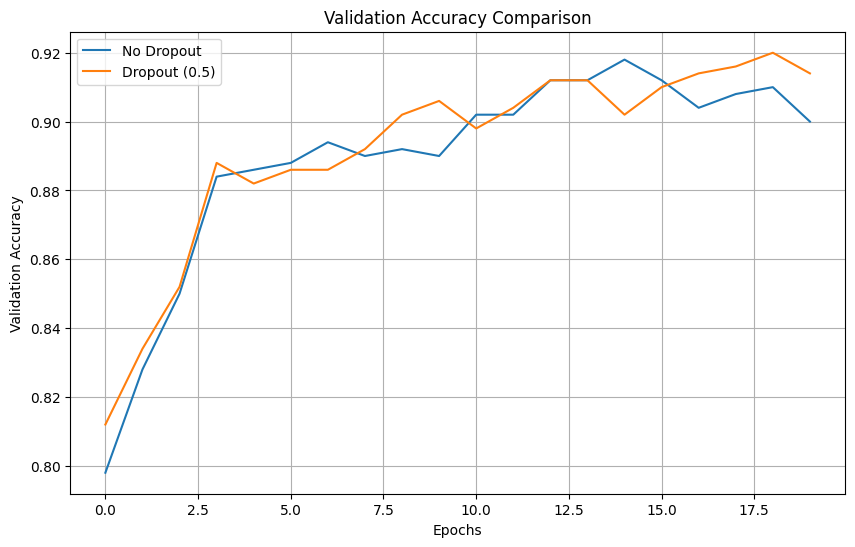

In [5]:
# Plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_no.history['val_accuracy'], label="No Dropout")
plt.plot(history_with.history['val_accuracy'], label="Dropout (0.5)")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


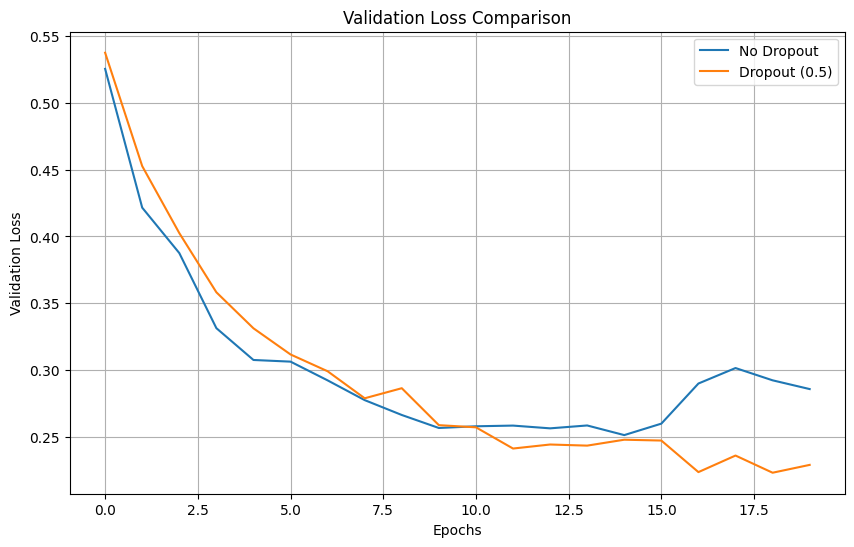

In [6]:
# Plot validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_no.history['val_loss'], label="No Dropout")
plt.plot(history_with.history['val_loss'], label="Dropout (0.5)")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


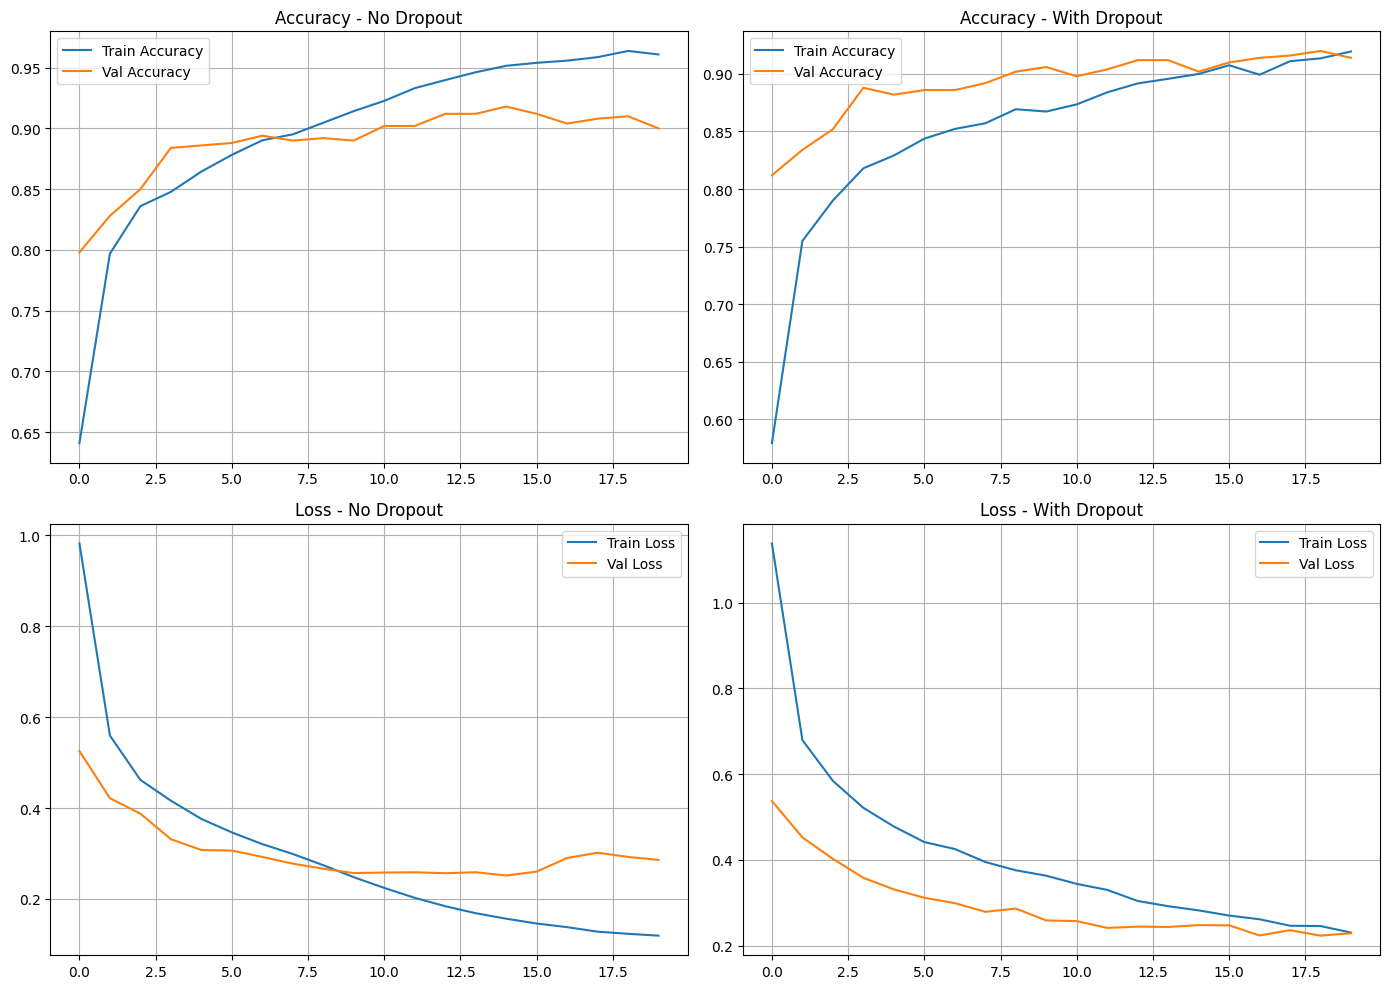

In [7]:
# Plot training and validation accuracy/loss side by side
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy - No Dropout
axs[0, 0].plot(history_no.history['accuracy'], label="Train Accuracy")
axs[0, 0].plot(history_no.history['val_accuracy'], label="Val Accuracy")
axs[0, 0].set_title("Accuracy - No Dropout")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Accuracy - Dropout
axs[0, 1].plot(history_with.history['accuracy'], label="Train Accuracy")
axs[0, 1].plot(history_with.history['val_accuracy'], label="Val Accuracy")
axs[0, 1].set_title("Accuracy - With Dropout")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Loss - No Dropout
axs[1, 0].plot(history_no.history['loss'], label="Train Loss")
axs[1, 0].plot(history_no.history['val_loss'], label="Val Loss")
axs[1, 0].set_title("Loss - No Dropout")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Loss - Dropout
axs[1, 1].plot(history_with.history['loss'], label="Train Loss")
axs[1, 1].plot(history_with.history['val_loss'], label="Val Loss")
axs[1, 1].set_title("Loss - With Dropout")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
